<a href="https://colab.research.google.com/github/deepintomlf/mlfbook/blob/master/Chapter5_NeuralNetwork/%E4%BA%BA%E5%B7%A5%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **第五章第二节 – 人工神经网络**
这个Jupyter笔记本包含了第五章第二节的所有源代码.

### Implementation

![alt text](https://docs.google.com/uc?export=download&id=1oWrlu3M05rP8GzEWU23EgTZpDiFj2Mop)



*   Input layer ( $h^{0}$): $h^{0}(x) = x$.
*  Hidden layer ($\{h^{l}\}_{l = 1}^{L-1}$);
* Output layer ($h^{L}$).

\begin{eqnarray*}
z^{l+1} &=& {\color{blue}W^{l}} h^{l} + {\color{blue}b^{l}},\\
h^{l+1} &=& {\color{red} \sigma}(z^{l+1}),
\end{eqnarray*}
where ${\color{red}\sigma}$ is an* activation function*, which is usually non-linear, e.g. the sigmoid function $\sigma(x) = \frac{1}{1+e^{-x}}$. The parameter set ${\color{blue}\theta} = (W^{l}, b^{l})_{l =1}^{L}$}.


###ANN Classification###
The input $x$ is a multi-dimensional vector; 

The ouput $y$ is a one-hot respresenation of the class. 


The number of neurons in the output layer is the total number of classes. 

The $j^{th}$ neurons in the output layer represents the probability of the output(label) being class $j$.  

 The **cross entropy **loss function is defined as follows:

\begin{eqnarray*}
L(\theta \vert \mathcal{D}) = - \frac{1}{N}\sum_{i =1}^{N} \sum_{k} \mathbb{1}( y_{i}=\text{ class }k) \log(p(y_{i} =\text{ class }k \vert x_{i})) 
\end{eqnarray*}

Note: The cross entropy between two probability distributions $p$ and $q$ is defined as 
\begin{eqnarray*}
H(p, q) =- \sum_{x} p(x)\log(q(x)).
\end{eqnarray*}

$L(\theta \vert \mathcal{D}) $ can be reformulated as 

\begin{eqnarray*}
L(\theta \vert \mathcal{D}) = - \frac{1}{N} \langle  y_{i}, \log(p_{\theta }(  \cdot \vert x_{i})) \rangle 
\end{eqnarray*}


#Pipelines of Supervised Learning Algorithms# 

The piplelines of the supervised learning algorithms are summarized as follows:

1.   Import Datasets;
2.   Take a look at the dataset (Statistical Analysis/Visualization);
3.    Pre-process the dataset to prepare for the training process (normalization/reshape data);
4.    Train a model;
5.    Validate a model;
6.    Cross Validation. 


** We will apply the shallow neural network to the MNIST dataset as a concrete example to go through the pipelines of supervised learning algorithm.**

Problem: Build an algorithm to identify the digit label from the handwritten image using the MNIST dataset. 

![alt text](http://corochann.com/wp-content/uploads/2017/02/mnist_plot.png)

## **预处理MNIST数据集中的数据**

In [1]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# 加载MNIST数据集
from keras.datasets import mnist
(x_mnist_train, y_mnist_train), (x_mnist_test, y_mnist_test) = mnist.load_data()

# 将输入图像数据从矩阵转换为向量
[n_samples_train, width, height] = np.shape(x_mnist_train)
[n_samples_test, width, height] = np.shape(x_mnist_test)
x_train = x_mnist_train.reshape([n_samples_train, width*height]).astype('float32')
x_test = x_mnist_test.reshape([n_samples_test, width*height]).astype('float32')

# 标准化输入数据
x_train /= 255
x_test /= 255

# 将输出的类别由整数编码转换为one-hot编码
num_classes = 10    
y_train = to_categorical(y_mnist_train, num_classes)
y_test = to_categorical(y_mnist_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step


## **使用浅层神经网络进行数字分类**

In [2]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def shallow_NN_model(n_hidden_neurons):
    """ 构建浅层神经网络 """
    start_time = time.time()
    print('Compiling Model ... ')
    model = Sequential()
    # 添加RelU激活函数的隐藏层
    model.add(Dense(n_hidden_neurons, activation='relu', input_dim=784))
    # 添加softmax激活函数的输出层
    model.add(Dense(10, activation = 'softmax'))
    # 这里我们使用Keras中SGD的常用参数设置 
    sgd = SGD(learning_rate=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model

# 创建一个模型实例
model = shallow_NN_model(n_hidden_neurons=50)

# 使用模型拟合数据集
hist_ANN = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_test, y_test), verbose=2)

Compiling Model ... 
Model compield in 5.885834217071533 seconds
Epoch 1/100
235/235 - 4s - loss: 0.3501 - accuracy: 0.8982 - val_loss: 0.1976 - val_accuracy: 0.9419
Epoch 2/100
235/235 - 1s - loss: 0.1654 - accuracy: 0.9521 - val_loss: 0.1546 - val_accuracy: 0.9544
Epoch 3/100
235/235 - 1s - loss: 0.1243 - accuracy: 0.9634 - val_loss: 0.1259 - val_accuracy: 0.9631
Epoch 4/100
235/235 - 1s - loss: 0.1023 - accuracy: 0.9691 - val_loss: 0.1164 - val_accuracy: 0.9649
Epoch 5/100
235/235 - 1s - loss: 0.0857 - accuracy: 0.9741 - val_loss: 0.1026 - val_accuracy: 0.9695
Epoch 6/100
235/235 - 1s - loss: 0.0752 - accuracy: 0.9768 - val_loss: 0.0973 - val_accuracy: 0.9716
Epoch 7/100
235/235 - 1s - loss: 0.0661 - accuracy: 0.9799 - val_loss: 0.0922 - val_accuracy: 0.9730
Epoch 8/100
235/235 - 1s - loss: 0.0590 - accuracy: 0.9823 - val_loss: 0.0892 - val_accuracy: 0.9737
Epoch 9/100
235/235 - 1s - loss: 0.0528 - accuracy: 0.9837 - val_loss: 0.0888 - val_accuracy: 0.9735
Epoch 10/100
235/235 - 1s 

## **绘制模型训练历史**

In [3]:
import matplotlib.pyplot as plt

# Define functions to plot the loss and accuracy
def plot_hist_var(hist, str_var):
  """ 绘制模型的损失函数或准确率 """
  plt.figure()
  plt.plot(hist.history[str_var], 'b', linewidth=1.5)
  plt.plot(hist.history['val_'+str_var], 'r', linewidth=1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel(str_var[0].upper()+str_var[1:])


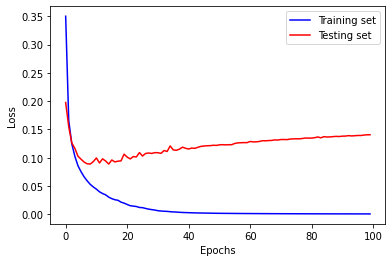

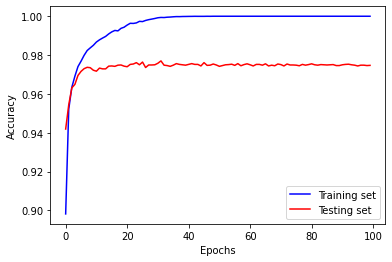

In [4]:
# 绘制模型在训练集和测试集上的损失函数和准确率
plot_hist_var(hist_ANN, 'loss')
plot_hist_var(hist_ANN, 'accuracy')

## **Assess the performance of a fitted model**


There are various measurements of the performance of the fitted models in classification problems.
*   Loss function and the accuracy;
*   Confusion matrix. 

In [5]:
score =  model.evaluate(x_test, y_test)
print(model.metrics_names)
print('Test ' + model.metrics_names[0] , score[0])
print('Test '+ model.metrics_names[1] , score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1406 - accuracy: 0.9747
['loss', 'accuracy']
Test loss 0.14057685434818268
Test accuracy 0.9746999740600586


In [6]:
from sklearn.metrics import confusion_matrix

Y_test_prob_pred = model.predict(x_test)
Y_test_class_pred = np.argmax(model.predict(x_test), axis=-1)
print(Y_test_class_pred)
cm = confusion_matrix( y_mnist_test, Y_test_class_pred )


[7 2 1 ... 4 5 6]


Confusion matrix, without normalization
[[ 970    0    2    2    1    1    1    1    2    0]
 [   0 1123    3    2    0    1    2    1    3    0]
 [   2    4 1001    5    4    0    2    8    5    1]
 [   1    0    7  977    1    9    1    3    5    6]
 [   2    0    2    0  956    0    4    2    1   15]
 [   3    1    1    9    1  862    7    2    3    3]
 [   4    3    0    1    4    5  940    0    1    0]
 [   0    2   12    2    4    1    0  999    3    5]
 [   8    3    2    7    2    4    1    2  942    3]
 [   1    3    0    6   11    5    0    3    3  977]]
Normalized confusion matrix
[[9.89795918e-01 0.00000000e+00 2.04081633e-03 2.04081633e-03
  1.02040816e-03 1.02040816e-03 1.02040816e-03 1.02040816e-03
  2.04081633e-03 0.00000000e+00]
 [0.00000000e+00 9.89427313e-01 2.64317181e-03 1.76211454e-03
  0.00000000e+00 8.81057269e-04 1.76211454e-03 8.81057269e-04
  2.64317181e-03 0.00000000e+00]
 [1.93798450e-03 3.87596899e-03 9.69961240e-01 4.84496124e-03
  3.87596899e-03 0.000000

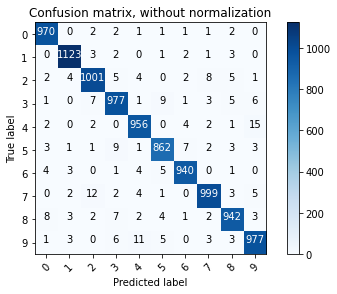

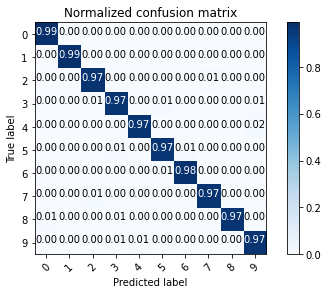

In [7]:
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b = 0)

## The code for the function plot_confusion_matrix() is attributed to http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# 绘制混淆矩阵
labels = np.arange(10)
plt.figure()
plot_confusion_matrix(cm, classes=list(map(str, labels)), title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm, classes=list(map(str, labels)), normalize=True, title='Normalized confusion matrix')
